In [47]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neural_network import MLPRegressor

Data Exploration

In [48]:
def statsAnalysis(dataFrame):
    statsDF = dataFrame.describe()
    statsDF.loc["range"] = statsDF.loc['max'] - statsDF.loc['min']
    return statsDF

In [49]:
dataFrameTrain = pd.read_csv('train.csv')

In [50]:
# analyse target value
statsAnalysis(dataFrameTrain['target'])

count    8250.000000
mean        0.867212
std         0.405036
min        -0.000000
25%         0.600000
50%         0.800000
75%         1.100000
max         3.500000
range       3.500000
Name: target, dtype: float64

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


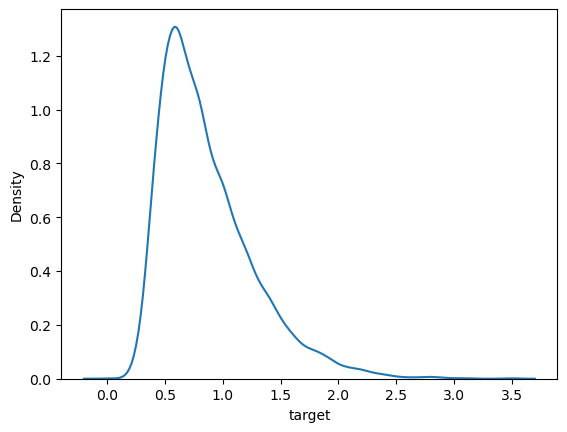

In [51]:
# plot target value kde
sb.kdeplot(dataFrameTrain['target'])
plt.show()

In [52]:
# analyse feature values
featuresDF = dataFrameTrain.drop(columns=['target'])
statsAnalysis(featuresDF)

,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time7_delta,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000
mean,-11.526061,-12.672970,1.051280,0.060387,0.629371,0.061248,-11.004848,-0.920364,-0.000957,-0.047842,...,-0.000018,-1.212121e-07,-0.000099,4.848485e-07,8.999901,-7.272727e-07,-0.000093,-10.000001,-0.510279,0.021982
std,259.637258,25.675733,0.320703,0.118805,0.313628,0.967274,4.140399,10.334136,0.013203,1.132179,...,0.000113,1.100964e-05,0.000615,6.963359e-05,0.000631,6.030154e-05,0.000613,0.000037,0.257113,0.006961
min,-975.000000,-95.000000,0.216536,-0.530000,-0.420000,-3.000000,-23.000000,-44.000000,-0.080000,-8.800000,...,-0.001000,-1.000000e-03,-0.006000,-2.000000e-03,8.995000,-4.000000e-03,-0.005000,-10.003000,-0.916291,0.012000
25%,-175.000000,-29.000000,0.802519,-0.020000,0.430000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.693147,0.018000
50%,-23.000000,-13.000000,1.020201,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.510826,0.020000
75%,157.000000,3.000000,1.258600,0.130000,0.800000,0.700000,-7.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.356675,0.023000
max,946.000000,94.000000,2.886371,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,8.700000,...,0.000600,0.000000e+00,0.003000,6.000000e-03,9.005000,2.000000e-03,0.007000,-10.000000,0.693147,0.073000
range,1921.000000,189.000000,2.669835,1.150000,3.000000,5.900000,20.000000,90.000000,0.136000,17.500000,...,0.001600,1.000000e-03,0.009000,8.000000e-03,0.010000,6.000000e-03,0.012000,0.003000,1.609438,0.061000


/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

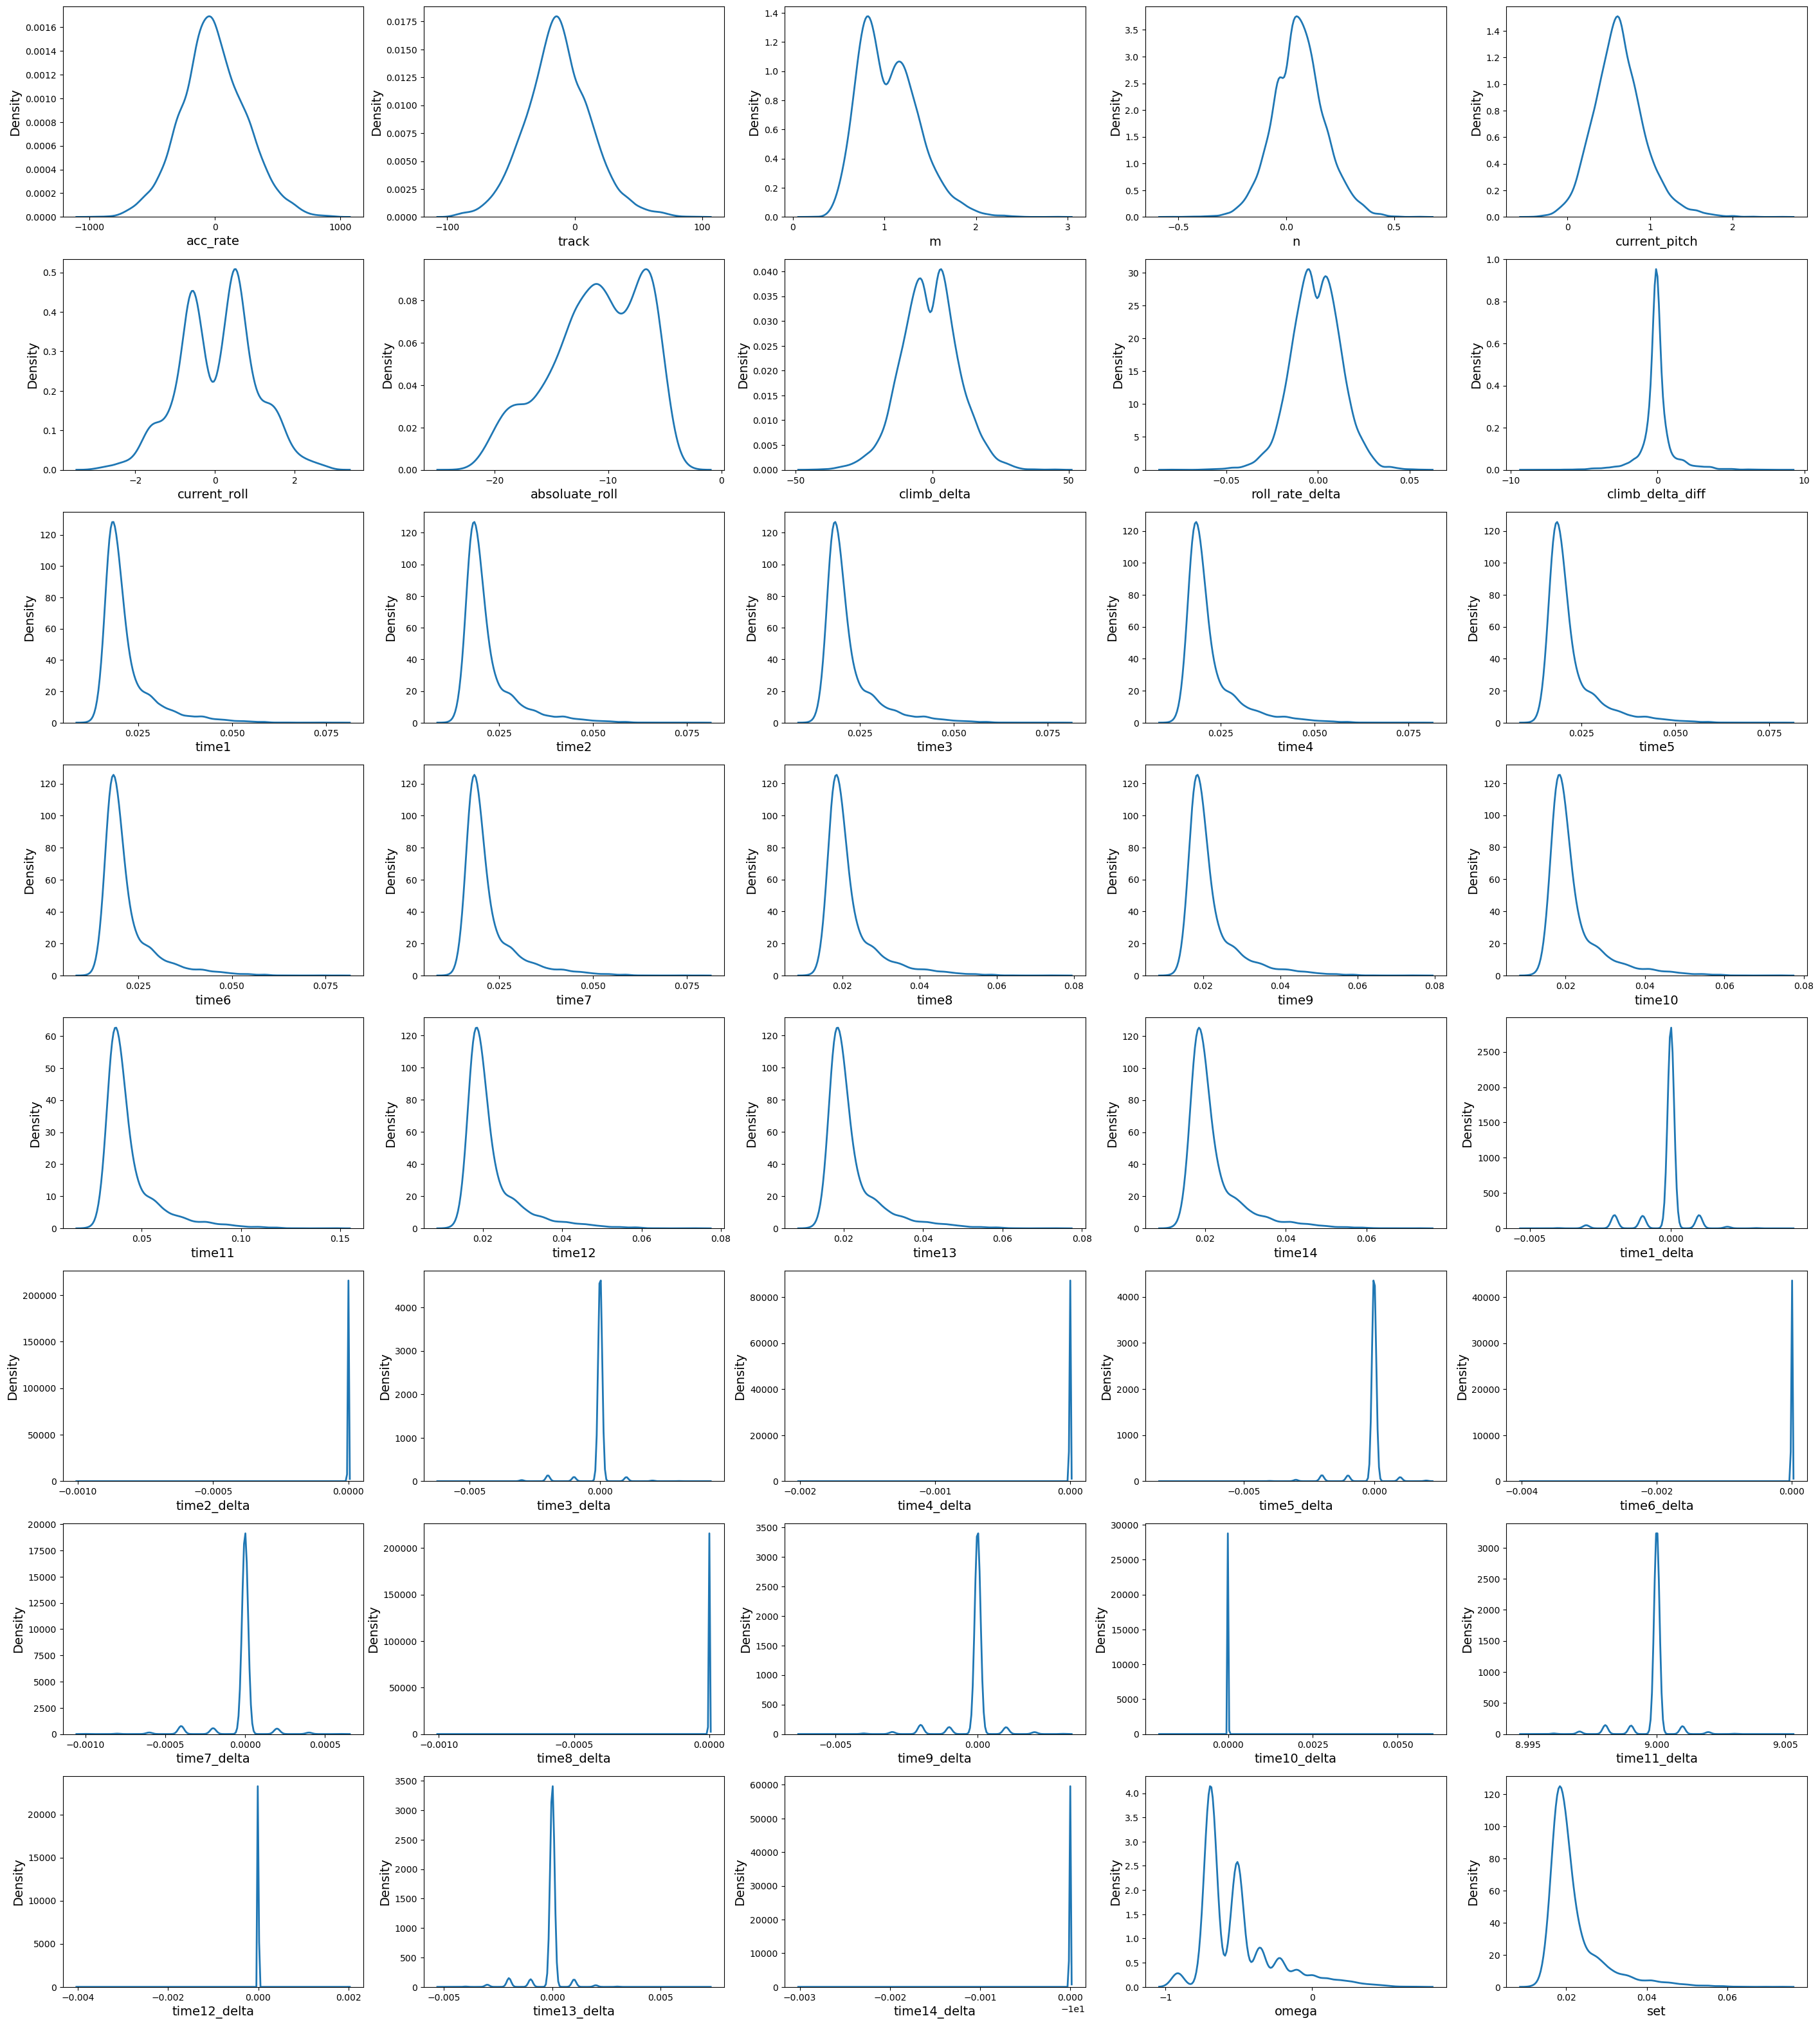

In [53]:
# plot feature kde
plotInd = 1
plt.figure(figsize=(35,40))
for col in featuresDF:
    plt.subplot(8,5,plotInd)
    ax = sb.kdeplot(featuresDF[col], linewidth = 2)
    ax.locator_params(nbins = 4,axis ='x')
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('Density', fontsize = 14)
    plotInd = plotInd + 1
plt.show()

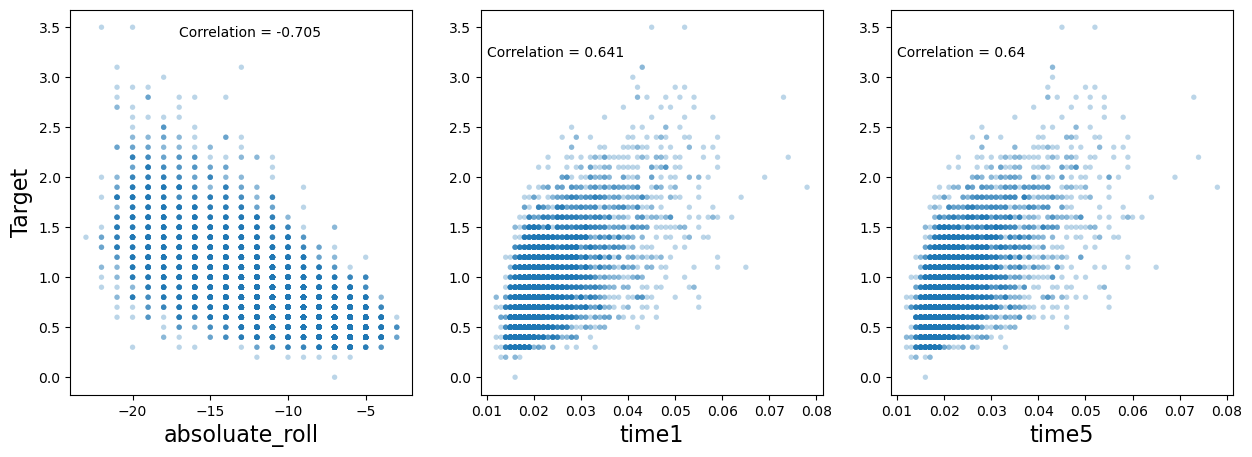

In [54]:
# Get the whole correlation matrix
correlationMat = dataFrameTrain.corr()

# Get the correlation of features to target
corrFeatureToTarget = correlationMat.target
corrFeatureToTargetAbs = corrFeatureToTarget.abs()
descendInd = corrFeatureToTargetAbs.sort_values(ascending=False)

# Scatter plot of the 3 most correlated features
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(dataFrameTrain[descendInd.index[1]],dataFrameTrain.target, c = 'tab:blue', s=15, alpha =0.3, edgecolors='none')
plt.text(-17,3.4,"Correlation = "+str(round(corrFeatureToTarget[descendInd.index[1]],3)))
plt.xlabel(descendInd.index[1], fontsize=16)
plt.ylabel('Target', fontsize=16)

plt.subplot(132)
plt.scatter(dataFrameTrain[descendInd.index[2]],dataFrameTrain.target, s=15, c = 'tab:blue', alpha =0.3, edgecolors='none')
plt.text(0.01,3.2,"Correlation = "+str(round(corrFeatureToTarget[descendInd.index[2]],3)))
plt.xlabel(descendInd.index[2], fontsize=16)
# plt.ylabel('Target', fontsize=16)

plt.subplot(133)
plt.scatter(dataFrameTrain[descendInd.index[3]],dataFrameTrain.target, s=15, c = 'tab:blue', alpha =0.3, edgecolors='none')
plt.text(0.01,3.2,"Correlation = "+str(round(corrFeatureToTarget[descendInd.index[3]],3)))
plt.xlabel(descendInd.index[3], fontsize=16)
# plt.ylabel('Target', fontsize=16)

plt.show()

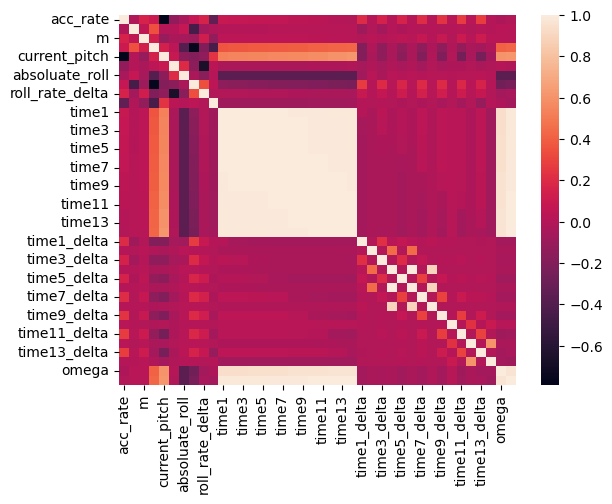

In [55]:
# Plot the correlation matrix of the features
featureNum = 40
plt.figure(2)
sb.heatmap(correlationMat.iloc[0:featureNum, 0:featureNum])
plt.show()

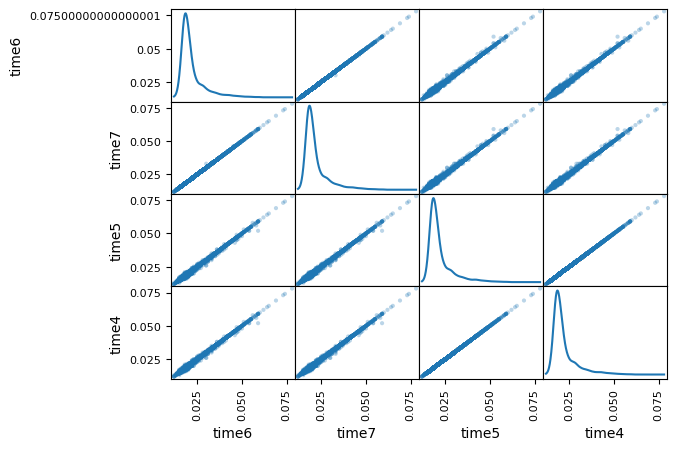

In [56]:
# Choose random feature and find three most correlated features with it, plot 4*4 scatter plots
featureInd = 15
corrToFeatureChosen = correlationMat.iloc[:,featureInd]
corrToFeatureChosenAbs = corrToFeatureChosen.abs()
descendIndTmp = corrToFeatureChosenAbs.sort_values(ascending=False)
dataCorrMost = dataFrameTrain.loc[:,[dataFrameTrain.columns[featureInd],descendIndTmp.index[1],descendIndTmp.index[2],descendIndTmp.index[3]]]

pd.plotting.scatter_matrix(dataCorrMost,diagonal='kde',alpha=0.3)
plt.show()

Bseline Models

In [57]:
X = dataFrameTrain.drop(columns='target')
Y = dataFrameTrain['target']

In [58]:
# random forest regression
cvNum = 5
RFInSampleError = []
RFOutSampleError = []
kf = KFold(n_splits = cvNum)
for train, test in kf.split(X, Y):
    RFRegr = RandomForestRegressor() # Used squared loss, which is default
    RFRegr.fit(X.iloc[train,:], Y.iloc[train])
    RFInSampleError = np.append(RFInSampleError,(RFRegr.predict(X.iloc[train,:])-Y.iloc[train])**2)
    RFOutSampleError = np.append(RFOutSampleError,(RFRegr.predict(X.iloc[test,:])-Y.iloc[test])**2)

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

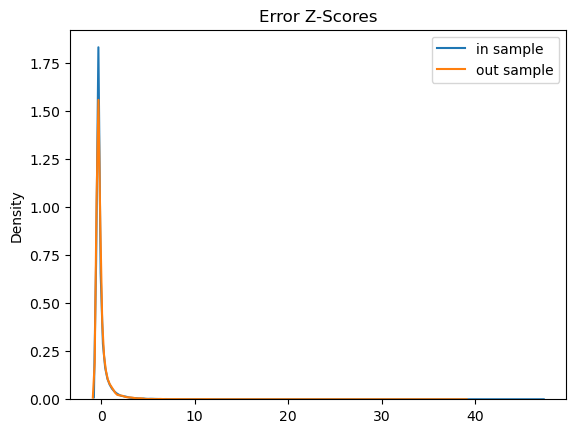

In [62]:
# compute z-score and plot kde
zscoreRFInSample = stats.zscore(RFInSampleError)
zscoreRFOutSample  = stats.zscore(RFOutSampleError)
sb.kdeplot(zscoreRFInSample, label='in sample')
sb.kdeplot(zscoreRFOutSample, label='out sample')
plt.title('Error Z-Scores')
plt.legend()
plt.show()

In [71]:
# gradient boost regression
cvNum = 5
GBInSampleError = []
GBOutSampleError = []
kf = KFold(n_splits = cvNum)
for train, test in kf.split(X, Y):
    BoostRegr = GradientBoostingRegressor(loss = 'squared_error', random_state=0, n_estimators=2000)
    BoostRegr.fit(X.iloc[train,:], Y.iloc[train])
    GBInSampleError = np.append(GBInSampleError,(BoostRegr.predict(X.iloc[train,:])-Y.iloc[train])**2)
    GBOutSampleError = np.append(GBOutSampleError,(BoostRegr.predict(X.iloc[test,:])-Y.iloc[test])**2)

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

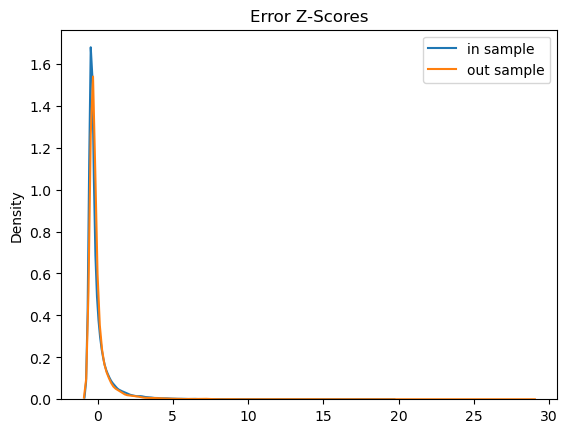

In [72]:
# compute z-score and plot kde
zscoreGBInSample = stats.zscore(GBInSampleError)
zscoreGBOutSample  = stats.zscore(GBOutSampleError)
sb.kdeplot(zscoreGBInSample, label='in sample')
sb.kdeplot(zscoreGBOutSample, label='out sample')
plt.title('Error Z-Scores')
plt.legend()
plt.show()

In [73]:
# neurel network regression
cvNum = 5
NNInSampleError = []
NNOutSampleError = []
kf = KFold(n_splits = cvNum)
for train, test in kf.split(X, Y):
    NNRegr = MLPRegressor()#hidden_layer_sizes= [100,100,100,40,40,40,20,10])
    NNRegr.fit(X.iloc[train,:], Y.iloc[train])
    NNInSampleError = np.append(NNInSampleError,(NNRegr.predict(X.iloc[train,:])-Y.iloc[train])**2)
    NNOutSampleError = np.append(NNOutSampleError,(NNRegr.predict(X.iloc[test,:])-Y.iloc[test])**2)

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

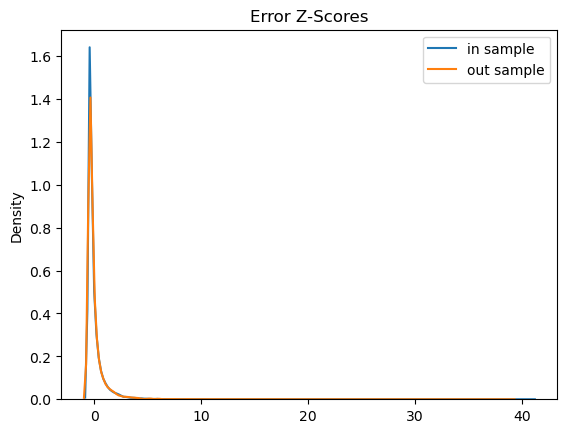

In [74]:
# compute z-score and plot kde
zscoreNNInSample = stats.zscore(NNInSampleError)
zscoreNNOutSample  = stats.zscore(NNOutSampleError)
sb.kdeplot(zscoreNNInSample, label='in sample')
sb.kdeplot(zscoreNNOutSample, label='out sample')
plt.title('Error Z-Scores')
plt.legend()
plt.show()

In [75]:
insample_results = [
    stats.ttest_rel(RFInSampleError, GBInSampleError),
    stats.ttest_rel(RFInSampleError, NNInSampleError),
    stats.ttest_rel(GBInSampleError, NNInSampleError),
]
print("Random Forest & Gradient descent In-sample Error T-Test: \n", "T-statistic =", round(tuple(insample_results[0])[0], 4), ", pvalue =", round(tuple(insample_results[0])[1], 4), "\n")
print("Random Forest & neural network In-sample Error T-Test: \n", "T-statistic =", round(tuple(insample_results[1])[0], 4), ", pvalue =", round(tuple(insample_results[1])[1], 4), "\n")
print("Neural network & Gradient descent In-sample Error T-Test: \n", "T-statistic =", round(tuple(insample_results[2])[0], 4), ", pvalue =", round(tuple(insample_results[2])[1], 4), "\n")


Random Forest & Gradient descent In-sample Error T-Test: 
 T-statistic = -44.2887 , pvalue = 0.0 

Random Forest & neural network In-sample Error T-Test: 
 T-statistic = -85.0369 , pvalue = 0.0 

Neural network & Gradient descent In-sample Error T-Test: 
 T-statistic = -73.6542 , pvalue = 0.0 



In [76]:
insample_results = [
    stats.ttest_rel(RFOutSampleError, GBOutSampleError),
    stats.ttest_rel(RFOutSampleError, NNOutSampleError),
    stats.ttest_rel(GBOutSampleError, NNOutSampleError),
]
print("Random Forest & Gradient descent Out-sample Error T-Test: \n", "T-statistic =", round(tuple(insample_results[0])[0], 4), ", pvalue =", round(tuple(insample_results[0])[1], 4), "\n")
print("Random Forest & neural network Out-sample Error T-Test: \n", "T-statistic =", round(tuple(insample_results[1])[0], 4), ", pvalue =", round(tuple(insample_results[1])[1], 4), "\n")
print("Neural network & Gradient descent Out-sample Error T-Test: \n", "T-statistic =", round(tuple(insample_results[2])[0], 4), ", pvalue =", round(tuple(insample_results[2])[1], 4), "\n")

Random Forest & Gradient descent Out-sample Error T-Test: 
 T-statistic = 1.3357 , pvalue = 0.1817 

Random Forest & neural network Out-sample Error T-Test: 
 T-statistic = -20.9274 , pvalue = 0.0 

Neural network & Gradient descent Out-sample Error T-Test: 
 T-statistic = -19.936 , pvalue = 0.0 

